In [81]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
# import requests
# from tqdm.auto import tqdm

## 1. Charger les images

In [42]:
train_images = np.load("../data/train_images.npy")
train_labels = np.load("../data/train_labels.npy")
test_images = np.load("../data/test_images.npy")
test_labels = np.load("../data/test_labels.npy")
X_train = train_images
Y_train = train_labels
X_test = test_images
Y_test = test_labels

## 2. Visualiser quelques images

In [39]:
## the labels
print(train_labels[0:4])

[5 0 4 1]


/tmp/ipykernel_39479/203008319.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


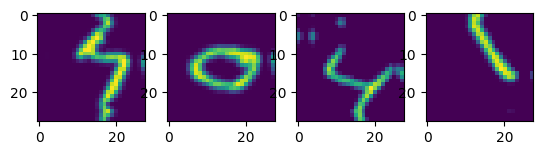

In [38]:
## the images, in the same order
fig, axs = plt.subplots(1,4)
for i in range(0,4):
    axs[i].imshow(train_images[i])
fig.show()    

In [41]:
# print(f'X:\n {X}')
# print(f'Y:\n {Y}')
print(f'Shape of data X:{X.shape}\n')
print(f'Shape of data Y:{Y.shape}\n')

Shape of data X:(60000, 28, 28, 1)

Shape of data Y:(60000,)



Les images ont comme dimensions 28x28 pixels, il y en a 60000.
1?

<BarContainer object of 10 artists>

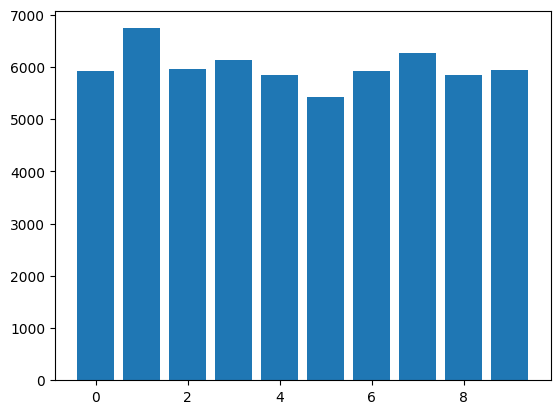

In [7]:
unique, counts = np.unique(Y, return_counts=True)
plt.bar(np.unique(Y), counts)

Les labels ne comportent que 10 valeurs, de 0 à 9, les chiffres contenus dans les images. 

## 3. Réaliser un premier apprentissage et une validation de la classification 

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv1D, Flatten, Conv2D
from tensorflow.keras import optimizers
from keras.utils import to_categorical
from keras.utils import plot_model

2024-09-24 21:03:02.526664: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 21:03:02.529308: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 21:03:02.535794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 21:03:02.546884: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 21:03:02.549989: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 21:03:02.559365: I tensorflow/core/platform/cpu_feature_gu

In [86]:
# On transforme les valeurs en vecteur de données one-hot
Y_train_oh = to_categorical(Y_train)
Y_test_oh = to_categorical(Y_test)
print(f'Y_train shape : {Y_train.shape} ; first value = {Y_train[0]}')
print(f'Y_train_oh shape : {Y_train_oh.shape} ; first value = {Y_train_oh[0]}')

Y_train shape : (60000,) ; first value = 5
Y_train_oh shape : (60000, 10) ; first value = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


kernel size 3
relu
dropout
softmax
learning rate
rmsprop vs adam
categorical cross-entropy
metrics -> accuracy
add checkpoints

In [98]:
def dense_simple():
    model = Sequential()  # Initialisation du modèle séquentiel
    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    # model.add(Flatten())
    # 10 output neuron for the 10 possibles labels, the 10 classes
    model.add(Dense(units=10, activation='softmax'))

    opt = optimizers.RMSprop(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'], weighted_metrics=["accuracy"])

    return model

In [99]:
model_dense = dense_simple()

/bigdisk/nick/Moi/etude/M2/artificial/MNIST/.pixi/envs/default/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

None


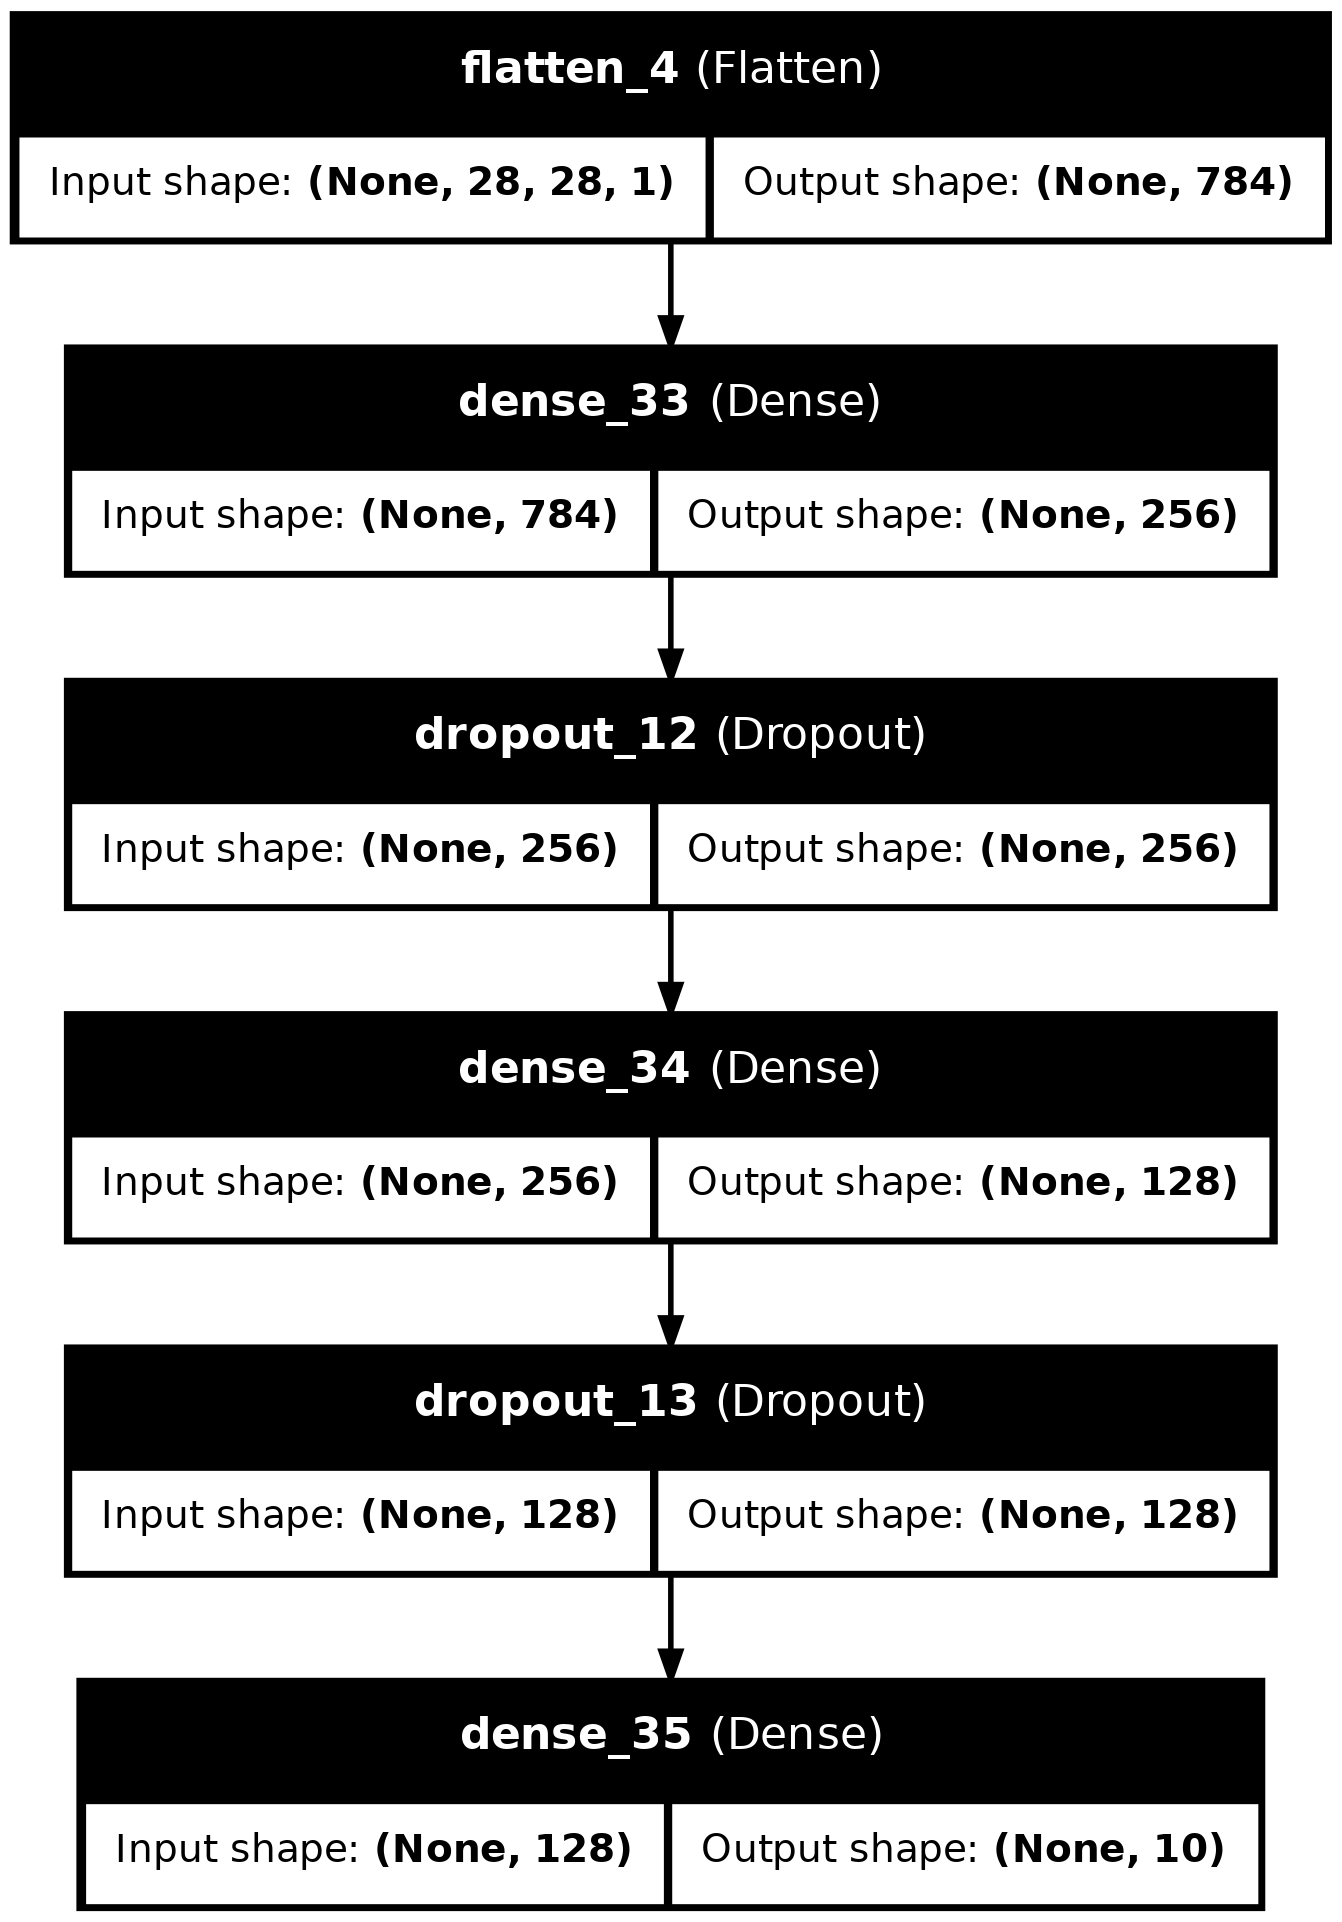

In [100]:
print(f'{model_dense.summary()}')
plot_model(model_dense, to_file="model_cnn.png",
               show_shapes=True, show_layer_names=True)

In [101]:
history_ds = model_dense.fit(X_train, Y_train_oh, validation_split=0.2, epochs=20, batch_size=50)

Epoch 1/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2658 - loss: 2.0353 - weighted_accuracy: 0.2658 - val_accuracy: 0.6065 - val_loss: 1.2309 - val_weighted_accuracy: 0.6065
Epoch 2/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5348 - loss: 1.3739 - weighted_accuracy: 0.5348 - val_accuracy: 0.6850 - val_loss: 1.0003 - val_weighted_accuracy: 0.6850
Epoch 3/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6104 - loss: 1.1800 - weighted_accuracy: 0.6104 - val_accuracy: 0.6997 - val_loss: 0.9471 - val_weighted_accuracy: 0.6997
Epoch 4/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6486 - loss: 1.0706 - weighted_accuracy: 0.6486 - val_accuracy: 0.7462 - val_loss: 0.8087 - val_weighted_accuracy: 0.7462
Epoch 5/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6777 - loss: 0.9980 - weighted_accuracy: 0.6777 - val_accuracy: 0.7738 - val_loss: 0.7350 - val_weighted_accuracy: 0.7738
Epoch 6/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accura

In [76]:
## save model
from keras.model import save_weights
model_dense.save_weights('../results/model_dense.v1')

ModuleNotFoundError: No module named 'keras.model'

In [102]:
print(history_ds)

In [ ]:
## cross val

dict_keys(['accuracy', 'loss', 'weighted_accuracy', 'val_accuracy', 'val_loss', 'val_weighted_accuracy'])


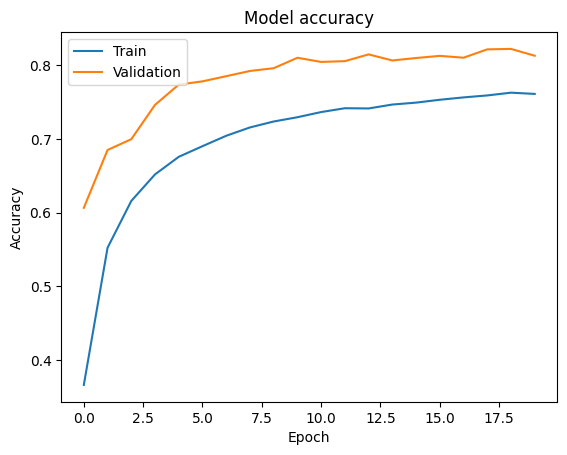

In [103]:
## plots of loss and accuracy and alternative to accuracy
print(history_ds.history.keys())
plt.plot(history_ds.history['accuracy'])
plt.plot(history_ds.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [79]:
Y_pred = model_dense.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


In [92]:
print(Y_pred.shape)
Y_test_oh.shape

(10000, 10)


(10000, 10)

In [87]:
## seaborn classification
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test_oh, Y_pred), annot=True)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [25]:
def cnn_simple():
    model = Sequential()  # Initialisation du modèle séquentiel

    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28,1)))

    # Deuxième couche de convolution 1D avec 64 filtres, kernel size de 3, activation ReLU
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform'))

    model.add(Flatten())

    model.add(Dense(10, activation='softmax'))

    opt = optimizers.RMSprop(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'], weighted_metrics=["accuracy"])

    return model

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │       368,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 387,466 (1.48 MB)

 Trainable params: 387,466 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

None


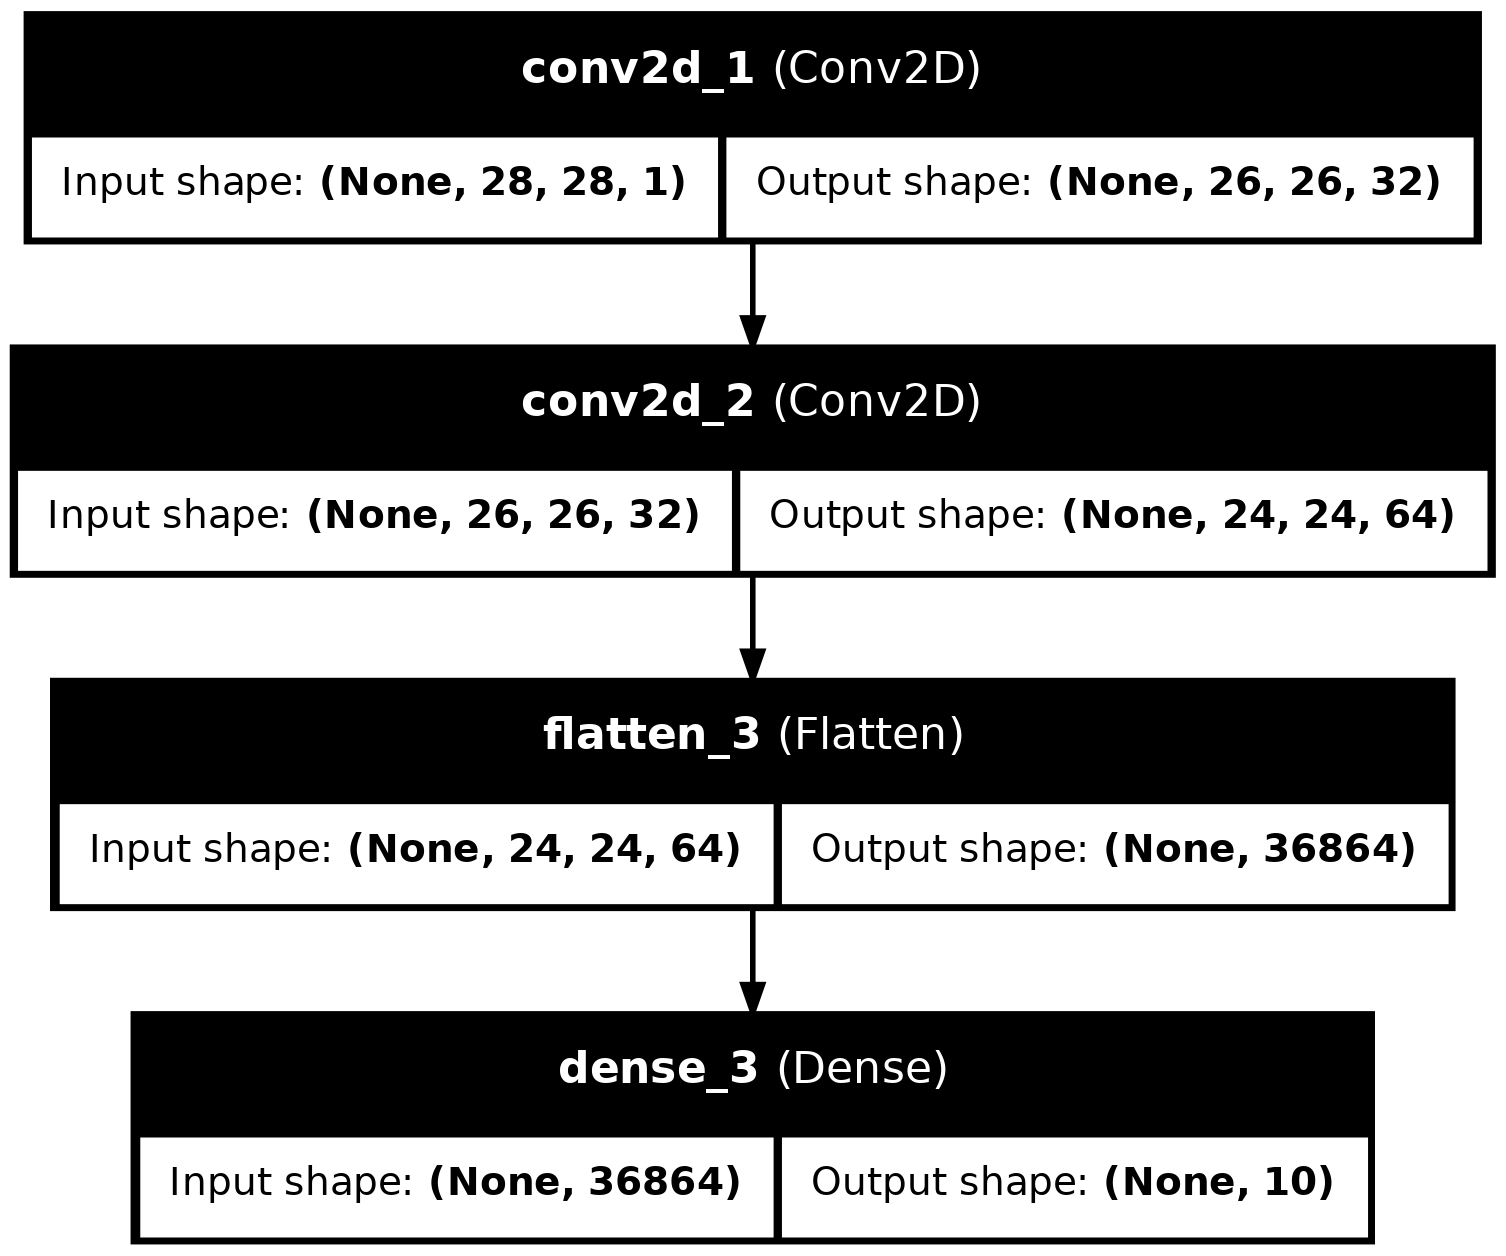

In [26]:
model_cnn = cnn_simple()
print(f'{model_cnn.summary()}')
plot_model(model_cnn, to_file="model_cnn.png",
               show_shapes=True, show_layer_names=True)

In [27]:
history_cnn = model_cnn.fit(X, Y_oh, validation_split=0.2, epochs=20, batch_size=50)

Epoch 1/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.4818 - loss: 1.5592 - weighted_accuracy: 0.4818 - val_accuracy: 0.7844 - val_loss: 0.6764 - val_weighted_accuracy: 0.7844
Epoch 2/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.8483 - loss: 0.4961 - weighted_accuracy: 0.8483 - val_accuracy: 0.8642 - val_loss: 0.4385 - val_weighted_accuracy: 0.8642
Epoch 3/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9138 - loss: 0.2866 - weighted_accuracy: 0.9138 - val_accuracy: 0.8730 - val_loss: 0.4091 - val_weighted_accuracy: 0.8730
Epoch 4/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9468 - loss: 0.1792 - weighted_accuracy: 0.9468 - val_accuracy: 0.8795 - val_loss: 0.4068 - val_weighted_accuracy: 0.8795
Epoch 5/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9669 - loss: 0.1118 - weighted_accuracy: 0.9669 - val_accuracy: 0.8769 - val_loss: 0.4422 - val_weighted_accuracy: 0.8769
Epoch 6/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/s

dict_keys(['accuracy', 'loss', 'weighted_accuracy', 'val_accuracy', 'val_loss', 'val_weighted_accuracy'])


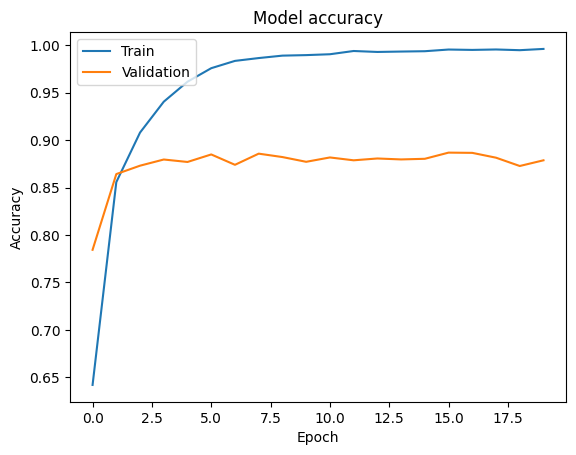

In [28]:
print(history_cnn.history.keys())
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
model_cnn.evaluate(X_test,to_categorical(Y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7683 - loss: 392.9299 - weighted_accuracy: 0.7683


[353.45318603515625, 0.78329998254776, 0.78329998254776, 0.78329998254776]